## Import Data and Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Creating path to main project 'InstacartBasket'

In [2]:
path = r"C:\Users\Leeza\Desktop\Data Analytics\Data Immersion\Python\Instacart Basket Analysis"

In [3]:
# Importing cust_ords_prods file
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods.pkl'))

In [4]:
df.head()

,user_id,first_name,last_name,gender,state,age,date_of_joining,dependents_counts,family_status,income,...,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_dspo,order_frequency
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Second Busiest day,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Second Busiest day,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Second Least busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer


## Q2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

###  As PII(Personally Identifiable Information) particularly includes sensitive data like names, email addresses, physical addresses, and phone numbers, we will have to eradicate two columns 'first_name' and 'last_name' to satisfy securiy concerns.

In [5]:
# Removing two columns from the df dataframe
df = df.drop(['first_name','last_name'],axis=1)

In [6]:
df.head()

,user_id,gender,state,age,date_of_joining,dependents_counts,family_status,income,order_id,order_number,...,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_dspo,order_frequency
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Mid-range product,Regularly busy,Second Busiest day,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Mid-range product,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Mid-range product,Regularly busy,Second Busiest day,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Mid-range product,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Mid-range product,Regularly busy,Second Least busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer


## Q3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
## Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
## Determine whether there’s a difference in spending habits between the different U.S. regions.

In [7]:
# Creating differents regions dataframes
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']


In [8]:
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [9]:
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [10]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [11]:
df.loc[df['state'].isin(Northeast), 'region'] = 'Northeast'

In [12]:
df.loc[df['state'].isin(Midwest), 'region'] = 'Midwest'

In [13]:
df.loc[df['state'].isin(South), 'region'] = 'South'

In [14]:
df.loc[df['state'].isin(West), 'region'] = 'West'

In [15]:
df.head()

,user_id,gender,state,age,date_of_joining,dependents_counts,family_status,income,order_id,order_number,...,Busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_dspo,order_frequency,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Regularly busy,Second Busiest day,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Regularly busy,Second Busiest day,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Regularly busy,Second Least busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest


In [16]:
#Comparing the spending habits between different regions of Usa
crosstab = pd.crosstab(df['spending_flag'], df['region'], dropna = False)

In [17]:
crosstab.to_clipboard()

In [18]:
crosstab

region,Midwest,Northeast,South,West
spending_flag,,,,
High Spender,155975,108225,209691,160354
Low Spender,7441350,5614511,10582194,8132559


### From the above output, it's clear that more people from western and midwestern regions like to spend more where as most of the southern population don't want to spend more.

## Q4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [19]:
# Creating exclusion flag for low-activity customers
df.loc[df['max_order']<5,'customer_status'] = 'less active'
df.loc[df['max_order']>=5,'customer_status'] = 'highly active'

In [20]:
df.head()

,user_id,gender,state,age,date_of_joining,dependents_counts,family_status,income,order_id,order_number,...,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_dspo,order_frequency,region,customer_status
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Second Busiest day,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,highly active
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,highly active
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Second Busiest day,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,highly active
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,highly active
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Second Least busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,highly active


In [21]:
df['customer_status'].value_counts()

highly active    30964564
less active       1440295
Name: customer_status, dtype: int64

In [22]:
# Excluding low active customers from the dataframe
df = df.drop(df[df['customer_status'] == 'less active'].index)

In [23]:
df['customer_status'].value_counts()

highly active    30964564
Name: customer_status, dtype: int64

In [24]:
# Exporting this dataframe as a pickle file
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_cust_ords_prods.pkl'))

## Q5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Age based profiling:

In [25]:
# Checking age for customer profiling
df['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [26]:
# Categorizing customers into different age groups
df.loc[(df['age'] >= 18) & (df['age'] <= 28), 'age_group'] = '18-28 years old'
df.loc[(df['age'] >= 29) & (df['age'] <= 39), 'age_group'] = '29-39 years old'
df.loc[(df['age'] >= 40) & (df['age'] <= 54), 'age_group'] = '40-54 years old'
df.loc[(df['age'] >= 55) & (df['age'] <= 69), 'age_group'] = '55-69 years old'
df.loc[(df['age'] >= 70) & (df['age'] <= 85), 'age_group'] = '70-85 years old'
df.loc[(df['age'] > 85) & (df['age'] < 18), 'age_group'] = 'unidentified'

In [27]:
df.head()

,user_id,gender,state,age,date_of_joining,dependents_counts,family_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_dspo,order_frequency,region,customer_status,age_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,highly active,40-54 years old
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,highly active,40-54 years old
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,highly active,40-54 years old
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,highly active,40-54 years old
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,highly active,40-54 years old


In [28]:
df['age_group'].value_counts()

40-54 years old    7301423
55-69 years old    7185148
70-85 years old    5812883
29-39 years old    5344798
18-28 years old    5320312
Name: age_group, dtype: int64

### Income based profiling

In [29]:
# Checking Income for customer profiling
df['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [30]:
# Categorizing customers into different income groups
df.loc[df['income'] <= 40000, 'income_group'] = 'Low Income'
df.loc[(df['income'] > 40000) & (df['income'] <= 90000 ), 'income_group'] = 'Average Income'
df.loc[df['income'] > 90000, 'income_group'] = 'High Income'


In [31]:
df['income_group'].value_counts()

High Income       17829832
Average Income    11522707
Low Income         1612025
Name: income_group, dtype: int64

### Profiling based on certain goods of department

In [32]:
# Importing department file to find the particular department name
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [33]:
dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [34]:
# Renaming 'Unnamed: 0' to 'dept_id'
dept.rename(columns = {'Unnamed: 0' : 'dept_id'}, inplace = True)

In [35]:
# Renaming again to match name of department_id column of previous data
dept.rename(columns = {'dept_id' : 'department_id'}, inplace = True)

In [36]:
# Merging the previous data with the department file
df = df.merge(dept, on = 'department_id')

In [37]:
df.head()

,user_id,gender,state,age,date_of_joining,dependents_counts,family_status,income,order_id,order_number,...,loyalty_flag,avg_prices,spending_flag,median_dspo,order_frequency,region,customer_status,age_group,income_group,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,highly active,40-54 years old,High Income,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,highly active,40-54 years old,High Income,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,highly active,40-54 years old,High Income,beverages
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,Regular customer,7.057534,Low Spender,26.0,Non-frequent customer,West,highly active,29-39 years old,Average Income,beverages
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,Regular customer,7.057534,Low Spender,26.0,Non-frequent customer,West,highly active,29-39 years old,Average Income,beverages


In [38]:
df['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

### Profiling based on number of dependents

In [39]:
df['family_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: family_status, dtype: int64

In [40]:
# customer income profiles
# Custom function to set 'customer_profile' based on conditions
def set_customer_profile(rw):
    if rw['family_status'] == 'single' and rw['dependents_counts'] == 0:
        return 'Single person'
    elif rw['family_status'] == 'single' and rw['dependents_counts'] > 0:
        return 'Single Parent with children'
    elif rw['family_status'] == 'married' and rw['dependents_counts'] >= 2:
        return 'Married with children'
    elif rw['family_status'] == 'married' and rw['dependents_counts'] == 1:
        return 'Married without children'
    else:
        return rw['family_status']  # Set 'customer_profile' to 'family_status'

# Apply the custom function to each row
df['customer_profile'] = df.apply(set_customer_profile, axis=1)

In [42]:
df['customer_profile'].value_counts()

Married with children               14532650
Married without children             7211061
Single person                        5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: customer_profile, dtype: int64

## Q6. Create an appropriate visualization to show the distribution of profiles.

Text(0.5, 1.0, 'Customer Profile')

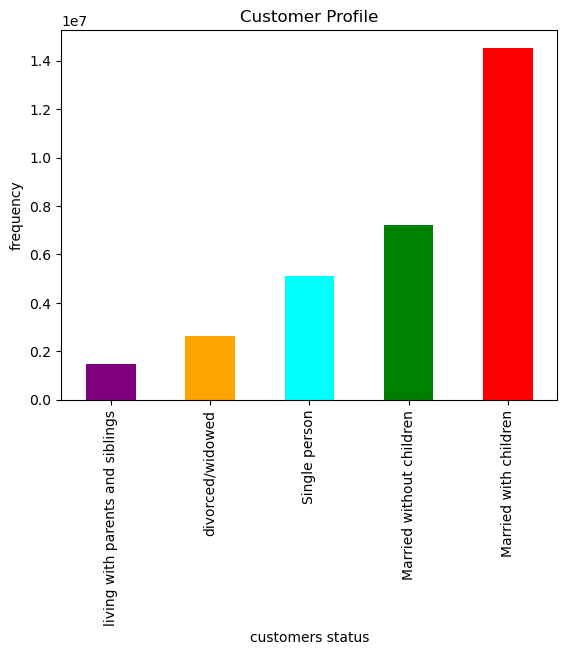

In [52]:
# Bar chart of customer profile

bar_cust_profile = df['customer_profile'].value_counts().sort_values().plot.bar(color =['purple', 'orange', 'cyan', 'green', 'red'])
plt.xlabel('customers status')
plt.ylabel('frequency')
plt.title('Customer Profile')

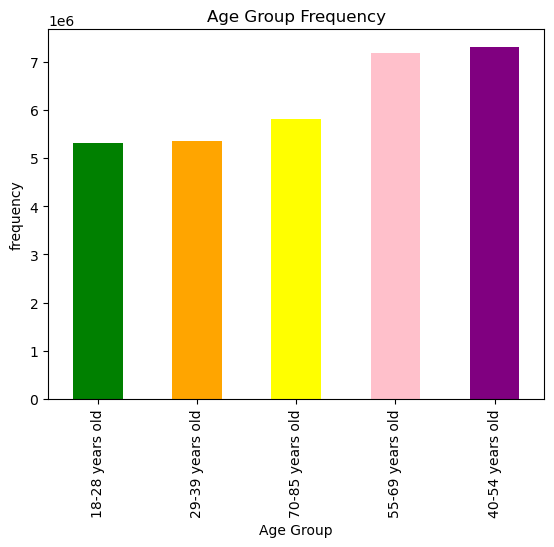

In [53]:
# Bar chart of age group
plt.xlabel('Age Group')
plt.ylabel('frequency')
plt.title('Age Group Frequency')
bar_age_group = df['age_group'].value_counts().sort_values().plot.bar(color =['green', 'orange', 'yellow', 'pink', 'purple'])

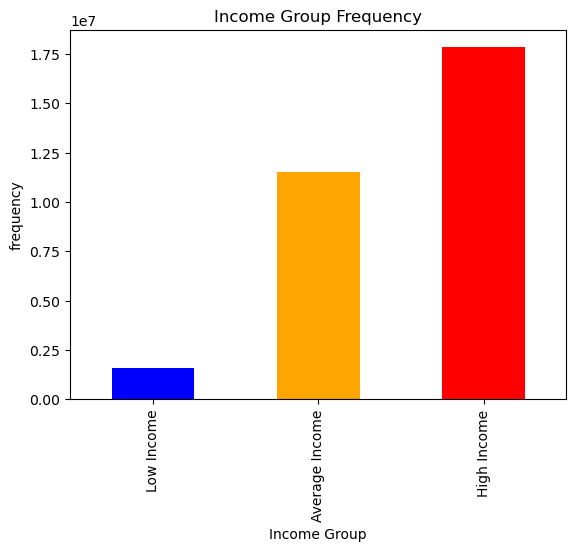

In [54]:
# Bar chart of income_group
plt.xlabel('Income Group')
plt.ylabel('frequency')
plt.title('Income Group Frequency')
bar_income_group = df['income_group'].value_counts().sort_values().plot.bar(color =['blue', 'orange', 'red'])

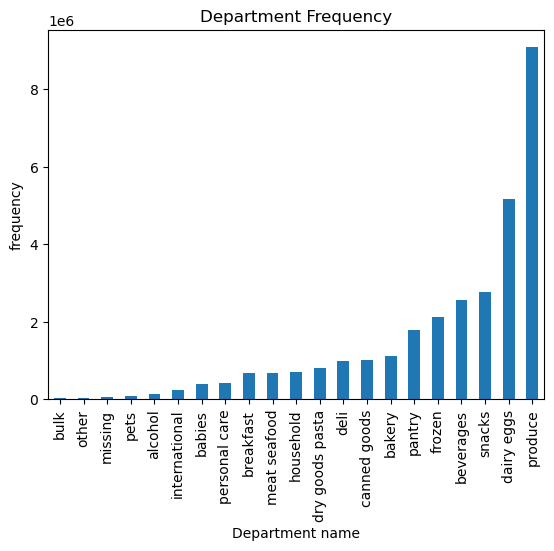

In [55]:
# Bar chart of department frequency
plt.xlabel('Department name')
plt.ylabel('frequency')
plt.title('Department Frequency')
bar_department = df['department'].value_counts().sort_values().plot.bar()

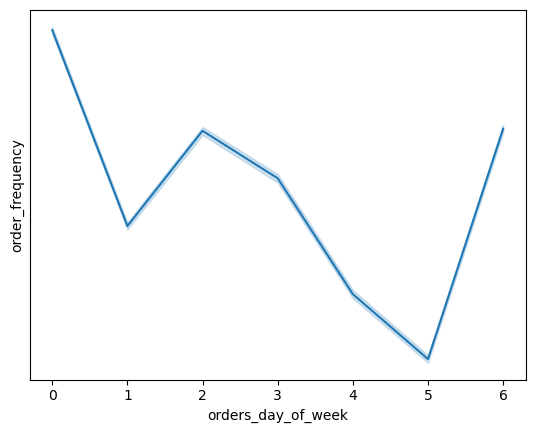

In [51]:
# Line chart for these two columns order frequency and orders day of week
line_days_of_week = sns.lineplot(data = df, x = 'orders_day_of_week',y = 'order_frequency')

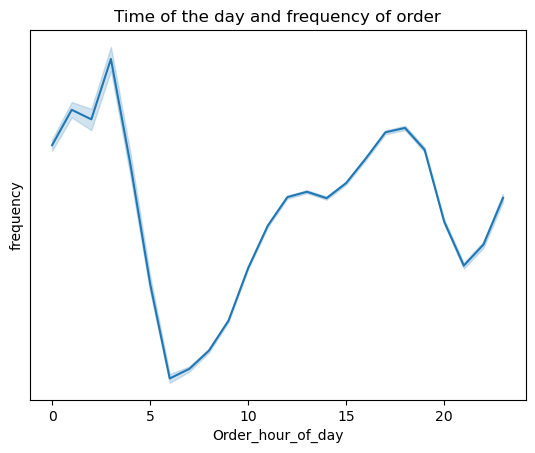

In [56]:
# Line chart for these two columns order frequency and orders hour of day
plt.xlabel('Order_hour_of_day')
plt.ylabel('frequency')
plt.title('Time of the day and frequency of order')
line_hour_of_day = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'order_frequency')

In [49]:
df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_of_joining',
       'dependents_counts', 'family_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'Busiest_day', 'Busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_prices',
       'spending_flag', 'median_dspo', 'order_frequency', 'region',
       'customer_status', 'age_group', 'income_group', 'department',
       'customer_profile'],
      dtype='object')

## Q7.Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [59]:
# aggregation function to get expenditure statistics group by department
df.groupby(['department']).agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
department                              
alcohol           8.150699  1.0     15.0
babies            7.634399  1.0     15.0
bakery            7.857482  1.0     15.0
beverages         7.682556  1.0     15.0
breakfast         8.031647  1.0     14.9
bulk              8.346919  1.4     14.1
canned goods      7.546660  1.0     15.0
dairy eggs       33.114597  1.0  99999.0
deli              7.783347  1.0     15.0
dry goods pasta   7.349370  1.0     15.0
frozen            7.733725  1.0     15.0
household         7.379951  1.0     15.0
international     7.678797  1.0     15.0
meat seafood     16.300034  8.0     25.0
missing           8.660655  1.0     15.0
other             6.961995  1.1     15.0
pantry            8.014482  1.0     20.0
personal care     7.998744  1.0     15.0
pets              7.887489  1.0     15.0
produce           7.980349  1.0     15.0
snacks            4.275555  1.6      7.0

In [66]:
# aggregation function to get expenditure statistics according to customer profile
df.groupby(['customer_profile']).agg({'prices': ['mean', 'min', 'max']})

prices              
                                       mean  min      max
customer_profile                                         
Married with children             12.102113  1.0  99999.0
Married without children          11.626527  1.0  99999.0
Single person                     12.398586  1.0  99999.0
divorced/widowed                  11.532741  1.0  99999.0
living with parents and siblings  10.890167  1.0  99999.0

In [71]:
# aggregation function to get expenditure statistics according to age group
df.groupby(['age_group']).agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
age_group                               
18-28 years old  12.419397  1.0  99999.0
29-39 years old  11.693599  1.0  99999.0
40-54 years old  11.721667  1.0  99999.0
55-69 years old  12.011249  1.0  99999.0
70-85 years old  11.879447  1.0  99999.0

## Q8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [84]:
#Compare customer profile income_group with region
crosstab_region = pd.crosstab(df['income_group'], df['region'], dropna=False)

In [85]:
crosstab_region

region,Midwest,Northeast,South,West
income_group,,,,
Average Income,2673051,2013862,3872707,2963087
High Income,4214879,3167699,5886328,4560926
Low Income,373583,283124,552104,403214


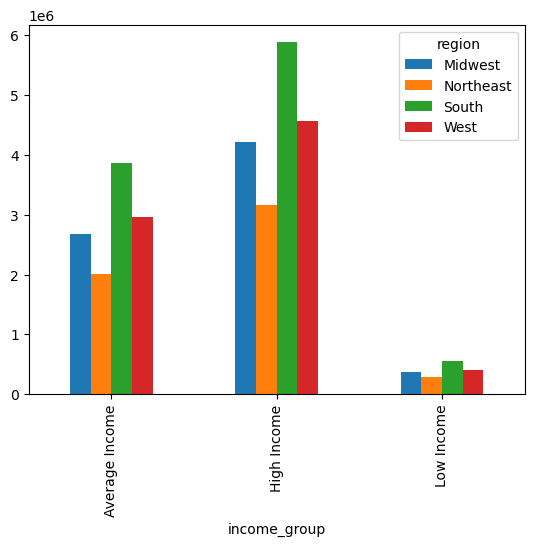

In [92]:
income_region = crosstab_region.plot.bar()

In [82]:
#Compare customer profile age group with department
crosstab_dept = pd.crosstab(df['age_group'], df['department'], dropna=False)

In [83]:
crosstab_dept

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
18-28 years old,25820,71595,192443,436781,117717,5870,175612,893099,172228,142556,...,119106,44678,115629,11394,6134,305510,73028,16461,1554416,476603
29-39 years old,25836,69861,193559,437392,114222,5754,174104,900204,173617,140943,...,119999,44168,114870,11105,5984,306652,71779,15457,1574437,481684
40-54 years old,33616,100201,264852,609660,159275,7836,238651,1218231,235388,193885,...,165878,61052,158587,15694,7984,420694,101854,21897,2135946,649383
55-69 years old,33264,93049,259605,598684,153383,7747,235559,1192472,234669,190841,...,161831,58467,158256,14624,8115,416135,99194,22254,2113250,639045
70-85 years old,26091,75686,210369,489384,126253,6244,188148,973176,187932,153911,...,133043,47626,127439,11951,6194,333714,78451,16991,1701224,519691


In [88]:
#Compare order_frequency with region
crosstab_region_expenditure = pd.crosstab(df['order_frequency'], df['region'], dropna=False)

In [89]:
crosstab_region_expenditure

region,Midwest,Northeast,South,West
order_frequency,,,,
Frequent customer,5166753,3919693,7407676,5714772
Non-frequent customer,523619,379091,732373,552334
Regular customer,1501808,1114707,2074732,1575957


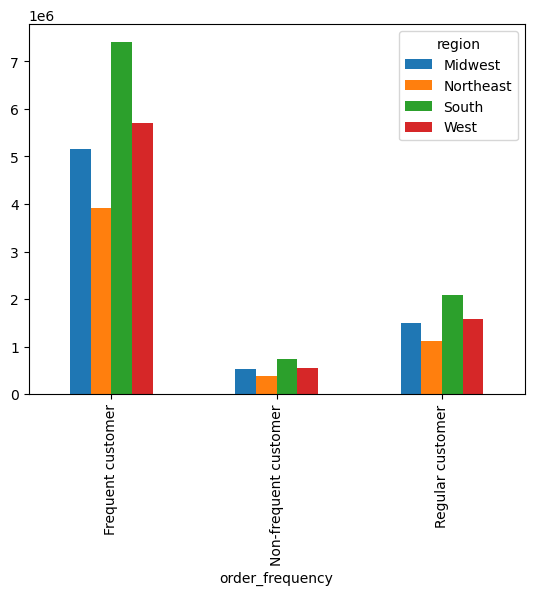

In [93]:
no_of_orders_region = crosstab_region_expenditure.plot.bar()

### If we observe both of the charts above, southern population have spent more and they belong to high income group. So we easily predict that high income group are spending more.

## Q9. Produce suitable charts to illustrate your results and export them in your project folder.

In [96]:
# Export visualizations
bar_cust_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_profile.png'))
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group.png'))
bar_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department.png'))
line_days_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_days_of_weekp.png'))
line_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_of_day.png'))
income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_regionp.png'))
no_of_orders_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'no_of_orders_region.png'))

In [97]:
# Export the final dataset
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'cust_ords_updated.pkl'))